In [24]:
import os
from importlib import reload

import torch
import numpy as np
import sciplots as plots
from sklearn.decomposition import PCA

from src import main
from src.utils import data
from src.utils.utils import open_config
from src.utils.clustering import CompactClusterEncoder

torch.serialization.add_safe_globals([CompactClusterEncoder])
reload(data)
reload(main)
# reload(single_plots)
from src.main import init
# from src import plots

In [25]:
_, config = open_config('main', '../config.yaml')

net_epochs = config['training']['epochs']
states_dir = config['output']['network-states-directory']
plots_dir = config['output']['plots-directory']

bahamas_colours = ['#0049E0', '#0090E0', '#00D7E0', '#2CDEE6', '#00E09E', '#00E051'][:-2]
bahamas_agn_colours = ['#F54EDF', '#5D4EF5']
bahamas_dmo = ['#00FA8F', '#01FB3D', '#89FA00']
flamingo_colours = ['#FABD00', '#FA2100', '#FA7700']
flamingo_test = ['#FA07A0']

In [26]:
known = [
    # 'flamingo',
    # 'flamingo_low',
    # 'flamingo_hi',
    'bahamas_cdm',
    # 'bahamas_cdm_low',
    # 'bahamas_cdm_hi',
    'bahamas_0.1',
    'bahamas_0.3',
    'bahamas_1',
]
# unknown = ['bahamas_dmo_cdm', 'bahamas_dmo_0.1', 'bahamas_dmo_1', 'flamingo_low_test', 'noise']
unknown = ['noise']

loaders, net, dataset = init(known, config, unknown=unknown)
print(net)

data = net.predict(loaders[1])
# data['targets'] = dataset.correct_unknowns(data['targets'].squeeze())
data['targets'] = data['targets'].squeeze()
labels = dataset.names[data['ids'][np.unique(
    data['targets'],
    return_index=True,
)[1]].astype(int)]


Training data size: 14400	Validation data size: 3600
Architecture: CompactClusterEncoder
Description: FLAMINGO AGN, DMO & Noise unknown
Network: network_v8
Epoch: 200
Optimiser: AdamW
Scheduler: ReduceLROnPlateau
Args: (method: mean, center_step: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], similarity_weight: 0, class_weight: 0.2, compact_weight: 0, distance_weight: 1, steps: 3, cluster_weight: 2.2)
Prediction time: 1.107e+00 s


In [18]:
distributions = []

for target in np.unique(data['targets']):
    idxs = target == data['targets']
    distributions.append(data['preds'][idxs].flatten())

(0.0, 1.0)

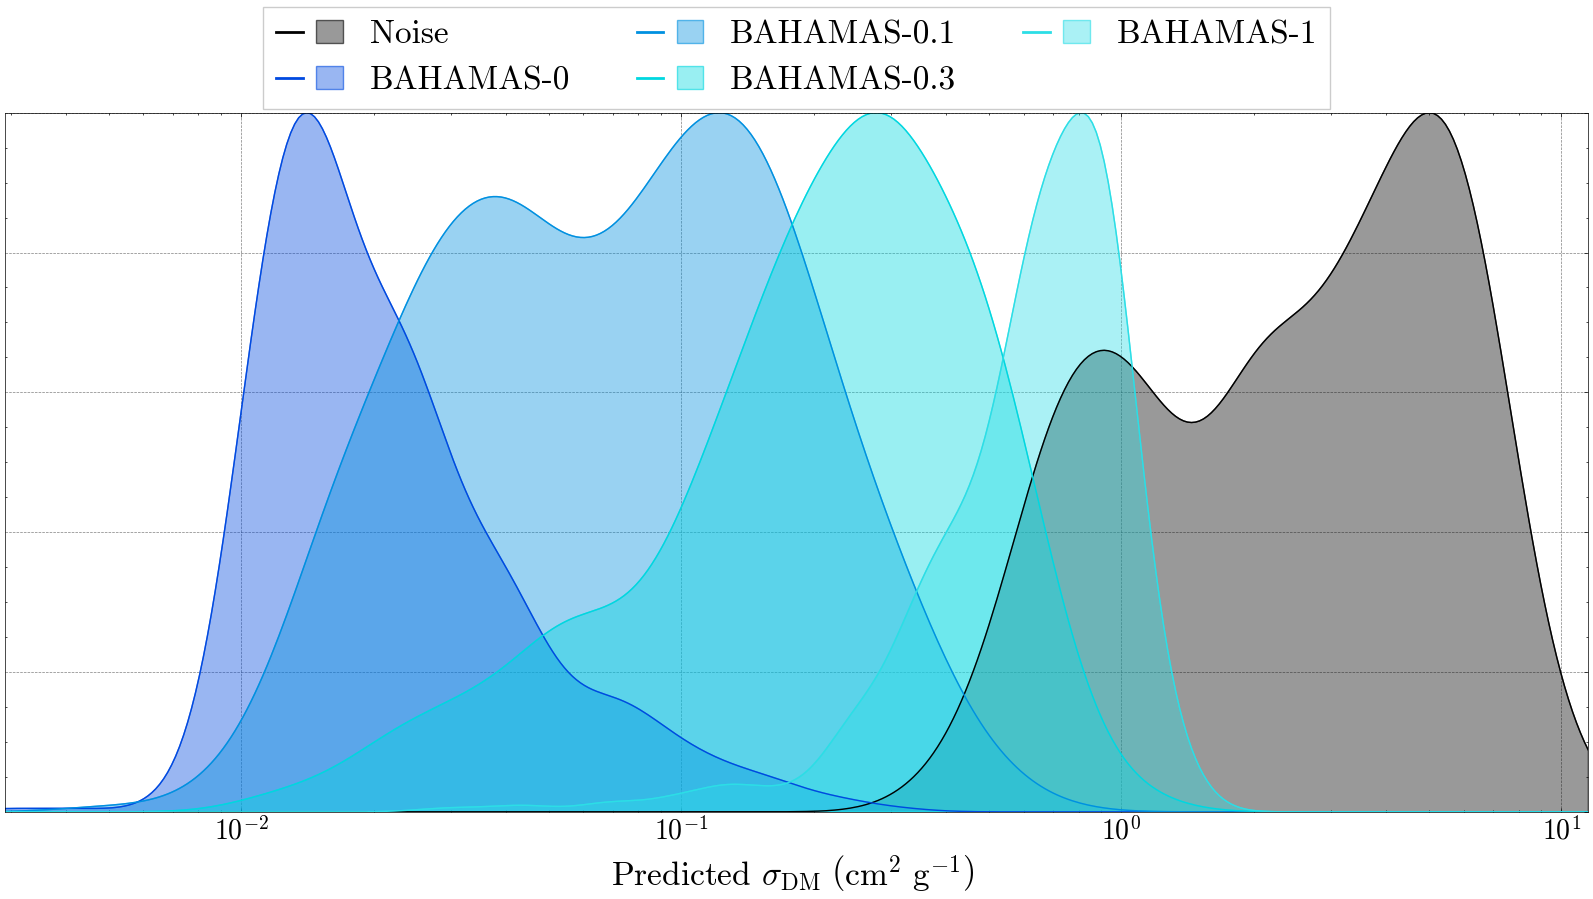

In [19]:
# idxs = [1, 5, 6, 7, 8, 9]
idxs = np.arange(len(distributions))
plot = plots.PlotDistribution(
    np.array(distributions, dtype=object)[idxs],
    log=True,
    norm=True,
    y_axes=False,
    density=True,
    # axis_pad=False,
    bins=400,
    x_label=r'Predicted $\sigma_{\rm DM}\ \left(\rm cm^2\ g^{-1}\right)$',
    labels=np.array(labels)[idxs],
    colours=['k'] + bahamas_colours,
)
plot.axes.set_xlim([np.min(data['preds']), np.max(data['preds'])])
plot.axes.set_ylim([0, 1])

In [20]:
plot.savefig('../plots/', name='test')